In [1]:
# import pandas.io.data as web
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt


# Read data and plot VNindex

In [2]:
HSX = pd.read_excel('data/VNINDEX.xlsx',index_col='Date/Time')
HSX.index = pd.to_datetime(HSX.index, format='%Y%m%d')

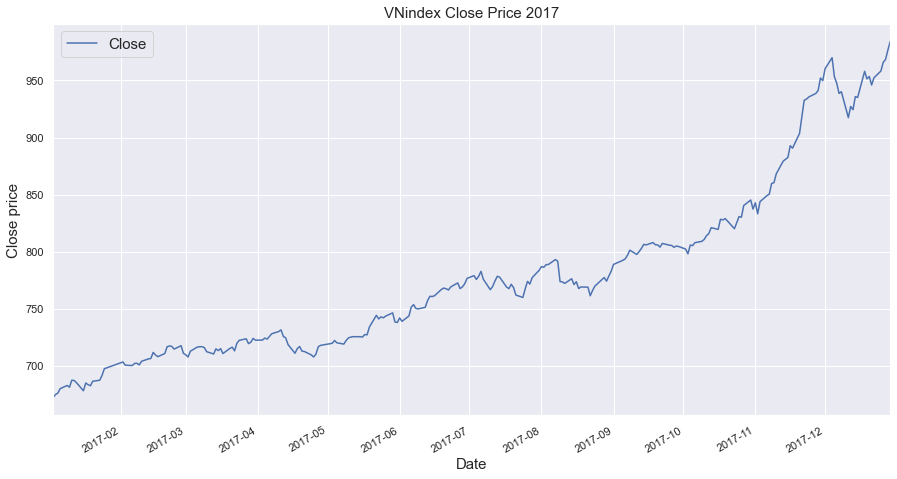

In [3]:
%matplotlib inline
seaborn.set()
plt.figure(figsize=(15,8))
HSX['Close'].plot()
plt.ylabel('Close price', fontsize = 15)
plt.xlabel('Date', fontsize = 15)
plt.legend(loc='upper left',fontsize=15)
plt.title("VNindex Close Price 2017", fontsize = 15)
plt.show()

In [4]:
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

# set timeframe for forecast and observation
history = HSX[(HSX.index < '2017-10-01')]['Close']
fc_span = HSX[(HSX.index >= '2017-10-01')]['Close']

## Plot PACF and ACF to choose p, q respectively for  ARIMA(p, d, q)

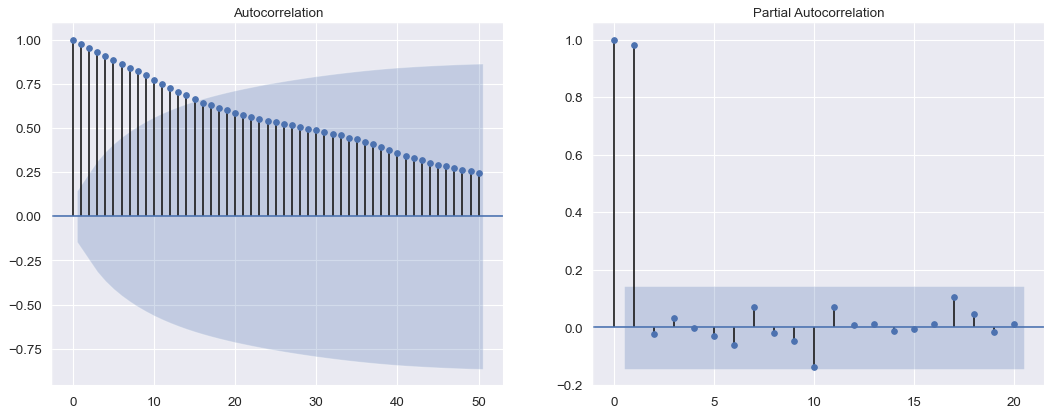

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 80)
plot_acf(history, ax=ax1, lags=50)
plot_pacf(history, ax=ax2, lags=20)

ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)

ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

In [12]:
dif = history.diff() # take first diferrent

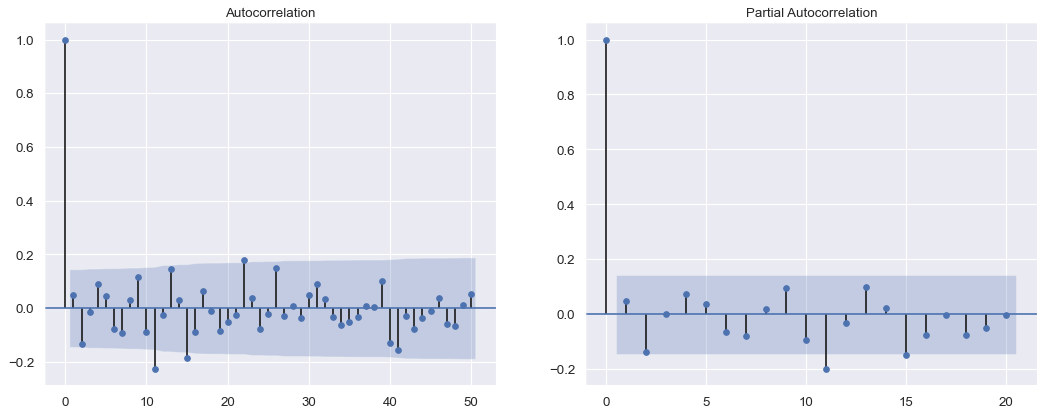

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 80)
plot_acf(dif.dropna(), ax=ax1, lags=50)
plot_pacf(dif.dropna(), ax=ax2, lags=20)

ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)

ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

# Predict each 5 days from OCT-2017 to DEC-2017

Based on, trial and error, choose ARIMA(5,1,1) to predict

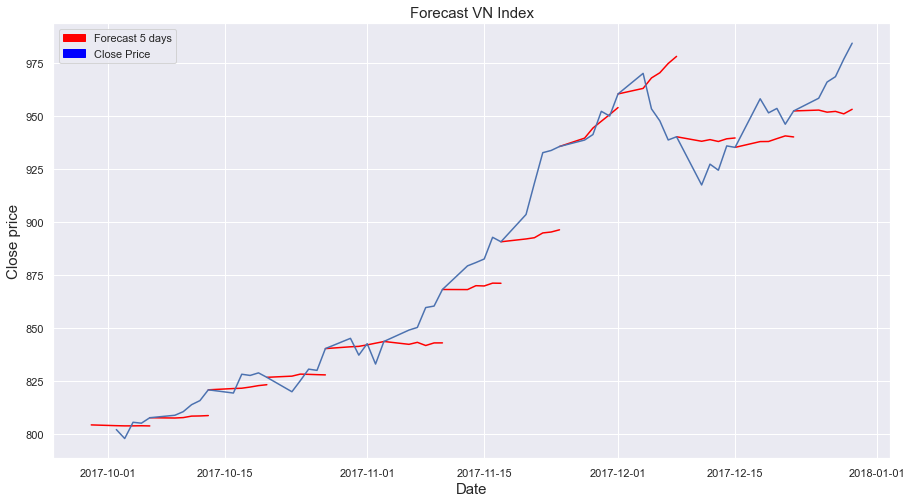

In [13]:
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Forecast 5 days')
blue_patch = mpatches.Patch(color='blue', label='Close Price')
predictions = list()
list_obs = list()

# Using ARIMA Model for prediction
plt.figure(figsize=(15,8))
for t in range(0,65,5):
    model = ARIMA(history, order=(5,1,1))
    model_fit = model.fit()
    output = model_fit.forecast(steps=5)
    obs = history[-1:].append(fc_span[t:t+5])
    list_obs.append(obs)
    index_of_fc = obs.index
    fc_series = pd.Series(list(history[-1:].append((output))), index=index_of_fc)
    history = history.append(obs)
    plt.plot(fc_series, color='red',label='Forecast')
    predictions.append(fc_series)
plt.plot(fc_span, label = 'True observation') # plot 
plt.title("Forecast VN Index", fontsize = 15)
plt.ylabel('Close price', fontsize = 15)
plt.xlabel('Date', fontsize = 15)
plt.legend(handles=[red_patch,blue_patch])
plt.show()

# Improve model in the future

To improve forecast model, I will attempt to change the parameter of ARIMA model to find the best one.
The best model is evaluated and choosen by estimate average RMSE during the testing time.

Besides that, I also try to implement other state-of-the-art models like LSTM to improve the result